In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [10]:
user_data.shape

(2954, 3)

In [11]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [12]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [13]:
logs.shape

(4500, 4)

In [14]:
logs.dtypes


client       int64
success       bool
platform    object
time         int64
dtype: object

In [15]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


Какой клиент совершил больше всего успешных операций?

In [79]:
success_number = (
                        logs.query('success == True') 
                            .groupby('client', as_index=False) 
                            .agg({'time':'count'}) 
                            .sort_values('time', ascending=False)
                            .rename(columns={'time':'count_success'})

)    

In [88]:
success_number

,client,count_success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [82]:
maximum_success = success_number.count_success.max()

In [94]:
succesful_clients = (success_number.query('count_success == @maximum_success') 
                                    .sort_values('client')
                                    .client 
                                    .tolist())

In [96]:
succesful_clients
# Список клиентов с наибольшим колличествои успешных операций

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы осуществляется наибольшее количество успешных операций?

In [68]:
max_success_platform = (
    logs.query('success == True') 
    .groupby('platform', as_index=False)
    .agg({'client':'count'})
    .sort_values('client', ascending=False)
)

или второй вариант решения:

In [97]:
max_success_platform_2 = (
    logs.query('success == True').platform.value_counts()
)

Какую платформу предпочитают премиумные клиенты?

In [113]:
platform_premiun_clients = (
    user_data.query('premium == True')
    .merge(logs, on='client')
    .platform
    .value_counts()
    .idxmax()
    
)

In [114]:
platform_premiun_clients

'phone'

Визуализировать распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [118]:
premium_client = user_data.query('premium == True')

In [128]:
not_premium_client = user_data.query('premium == False')

<Axes: xlabel='age', ylabel='Count'>

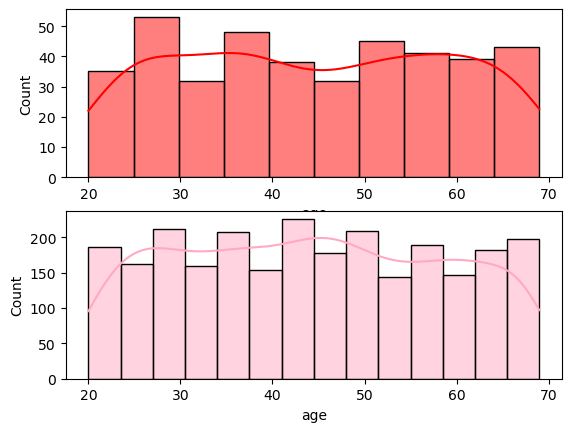

In [142]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)

sns.histplot(premium_client.age, ax = ax[0], kde=True, color = 'red')
sns.histplot(not_premium_client.age, ax = ax[1], kde=True, color = '#FFA9C2')

Построить график распределения числа успешных операций

In [144]:
data = logs.merge(user_data)

In [160]:
success_operation = data.groupby('client') \
                        .agg({'success': 'sum'})

In [161]:
success_operation.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

C:\Users\Юлия\AppData\Local\Temp\ipykernel_3812\3799470041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(success_operation, kde=False, color = 'green')


<Axes: >

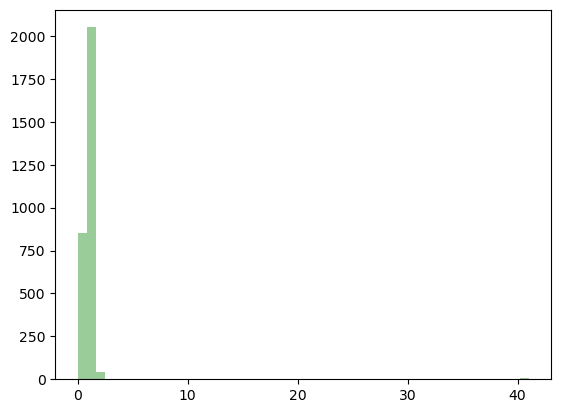

In [165]:
sns.distplot(success_operation, kde=False, color = 'green')

Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.barplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [184]:
computer_success = (
data.query('success == True and platform == "computer"') 
    .groupby('age', as_index=False) 
    .agg({'client':'count'})
    .rename(columns={'client':'count_client'})
)    

<Axes: xlabel='age', ylabel='count_client'>

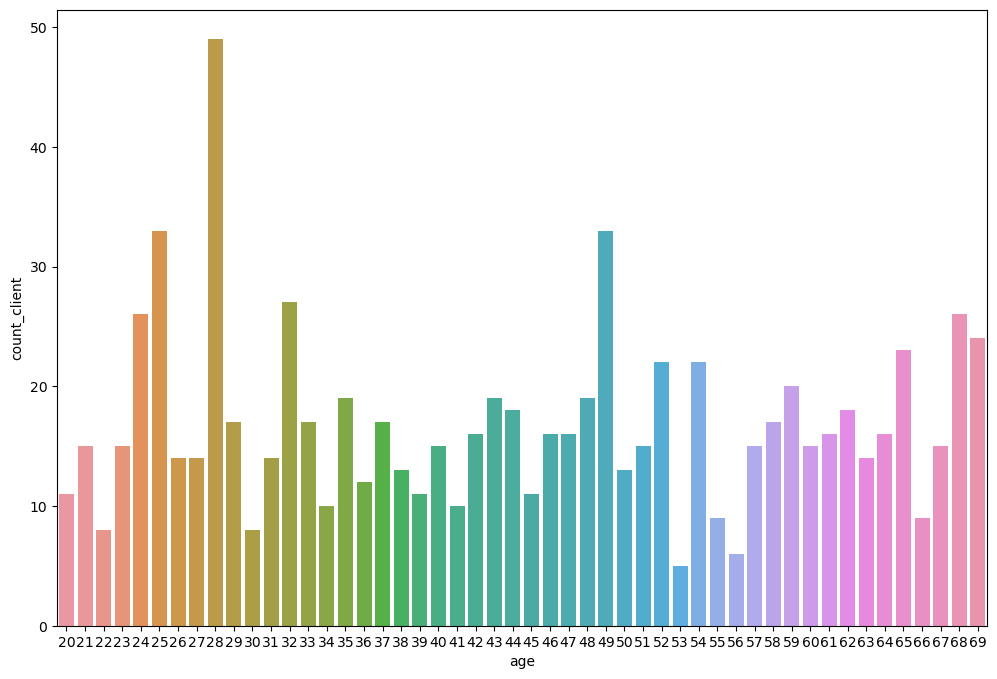

In [189]:
plt.figure(figsize=(12, 8))
sns.barplot(computer_success, x = 'age', y = 'count_client')